In [40]:
print("                                                                 Health Data Analysis")
print("Group Members :")
print("               1. Adhyatma Chrysostomos Davu (103012340479)")
print("               2. Nazario Jose Valente da Cruz (103012350552)")
print("               3. Anirudh Chaudhary (2024019796)")
print("               4. Mohammad Sahil (2024019804)")

print("\n =============================================================================================")
print("\n Objective:")
print("         Our work focus in this project is about to find the most suitable model for") 
print("         finding the age probability of man can get hypertension and diabetes. ")
print("\n ===============================================================================================")
print("\n Conclusion:")
print("         The Best model for this problem actually in Decision Tree and KNN which had high accuracy equal to 0.732240")
print("\n ===============================================================================================")
print("\n Contribution of Team :")
print("               1. Adhyatma Chrysostomos Davu (103012340479)")
print("                     Make Data Preparation and Evaluation code;") 
print("                     make the PPT for the Presentation for Data Preparation and Evaluation and also the Decision tree.")
print("               2. Nazario Jose Valente da Cruz (103012350552)")
print("                     Make Naive Bayes Algorithm code;")
print("                     make the PPT for the Presentation for Naive Bayes and KNN;")
print("                     and the conclusion and comparison for that 3 models that show the Decision tree and KNN are the most suitable model for that case.")
print("               3. Anirudh Chaudhary (2024019796)")
print("                     Make KNN Algorithm code analysis.")
print("               4. Mohammad Sahil (2024019804)")
print("                     Make the Decision tree code analysis.")

                                                                 Health Data Analysis
Group Members :
               1. Adhyatma Chrysostomos Davu (103012340479)
               2. Nazario Jose Valente da Cruz (103012350552)
               3. Anirudh Chaudhary (2024019796)
               4. Mohammad Sahil (2024019804)


 Objective:
         Our work focus in this project is about to find the most suitable model for
         finding the age probability of man can get hypertension and diabetes. 


 Conclusion:
         The Best model for this problem actually in Decision Tree and KNN which had high accuracy equal to 0.732240


 Contribution of Team :
               1. Adhyatma Chrysostomos Davu (103012340479)
                     Make Data Preparation and Evaluation code;
                     make the PPT for the Presentation for Data Preparation and Evaluation and also the Decision tree.
               2. Nazario Jose Valente da Cruz (103012350552)
                     Make Naive Bayes A

In [2]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.inspection import permutation_importance

from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [3]:
# Step 2: Load dataset
df = pd.read_csv("main.csv")
df = df[['age', 'gender', 'diabetes', 'hypertension']]

In [4]:
# Step 3: Handle missing values
print("Missing values:\n", df.isnull().sum())
df = df.dropna()

Missing values:
 age             0
gender          0
diabetes        0
hypertension    0
dtype: int64


In [5]:
# Step 4: Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=False)

In [6]:
# Step 5: Create age_group as the target
def age_group(age):
    if age <= 40:
        return 0
    elif age <= 60:
        return 1
    else:
        return 2

df_encoded['age_group'] = df_encoded['age'].apply(age_group)

In [7]:
# Step 6: Define features and target
X = df_encoded.drop(columns=['age', 'age_group'])
y = df_encoded['age_group']

In [8]:
# Step 7: Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

In [9]:
# Step 8: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

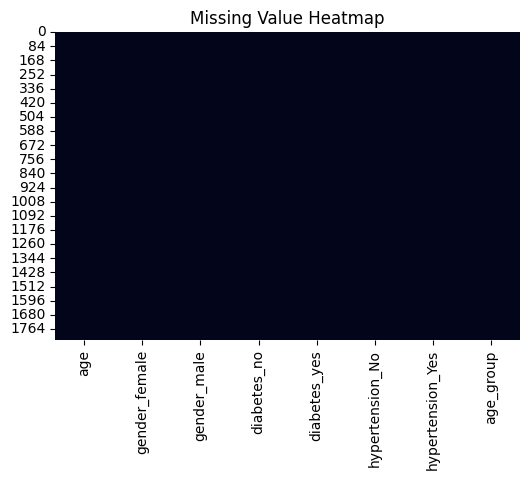

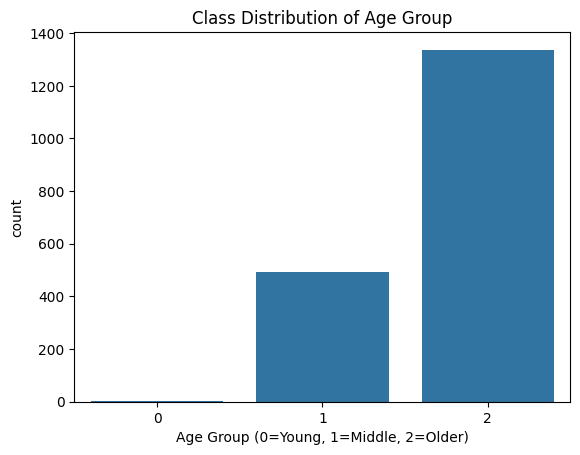

In [10]:
# Step 9: Visualizations
plt.figure(figsize=(6, 4))
sns.heatmap(df_encoded.isnull(), cbar=False)
plt.title("Missing Value Heatmap")
plt.show()

sns.countplot(x='age_group', data=df_encoded)
plt.title("Class Distribution of Age Group")
plt.xlabel("Age Group (0=Young, 1=Middle, 2=Older)")
plt.show()

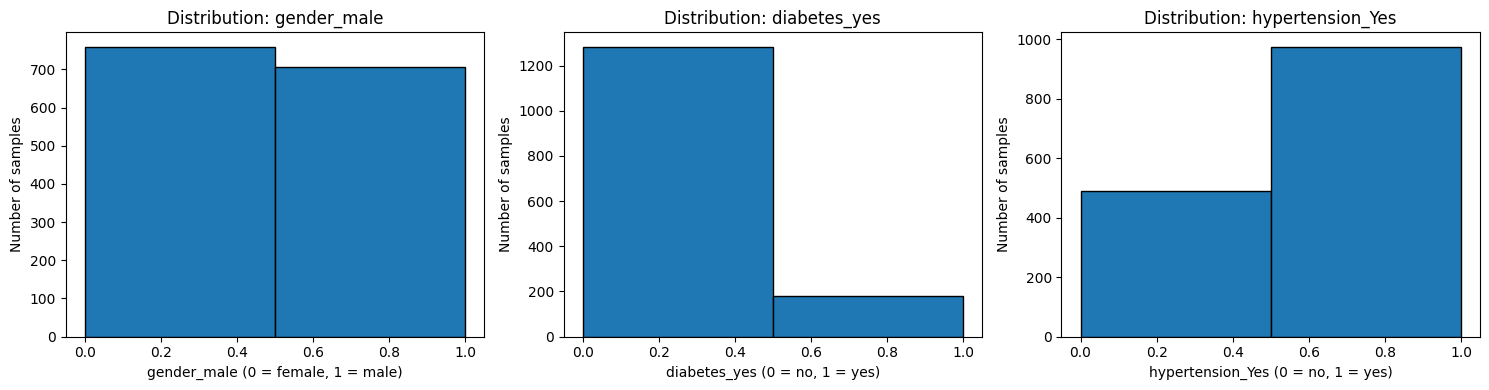

In [11]:
# Step 10: Feature Distribution Before Scaling (with axis labels)

fig, axs = plt.subplots(1, 3, figsize=(15, 4))

axs[0].hist(X_train['gender_male'].astype(int), bins=2, edgecolor='black')
axs[0].set_title("Distribution: gender_male")
axs[0].set_xlabel("gender_male (0 = female, 1 = male)")
axs[0].set_ylabel("Number of samples")

axs[1].hist(X_train['diabetes_yes'].astype(int), bins=2, edgecolor='black')
axs[1].set_title("Distribution: diabetes_yes")
axs[1].set_xlabel("diabetes_yes (0 = no, 1 = yes)")
axs[1].set_ylabel("Number of samples")

axs[2].hist(X_train['hypertension_Yes'].astype(int), bins=2, edgecolor='black')
axs[2].set_title("Distribution: hypertension_Yes")
axs[2].set_xlabel("hypertension_Yes (0 = no, 1 = yes)")
axs[2].set_ylabel("Number of samples")

plt.tight_layout()
plt.show()

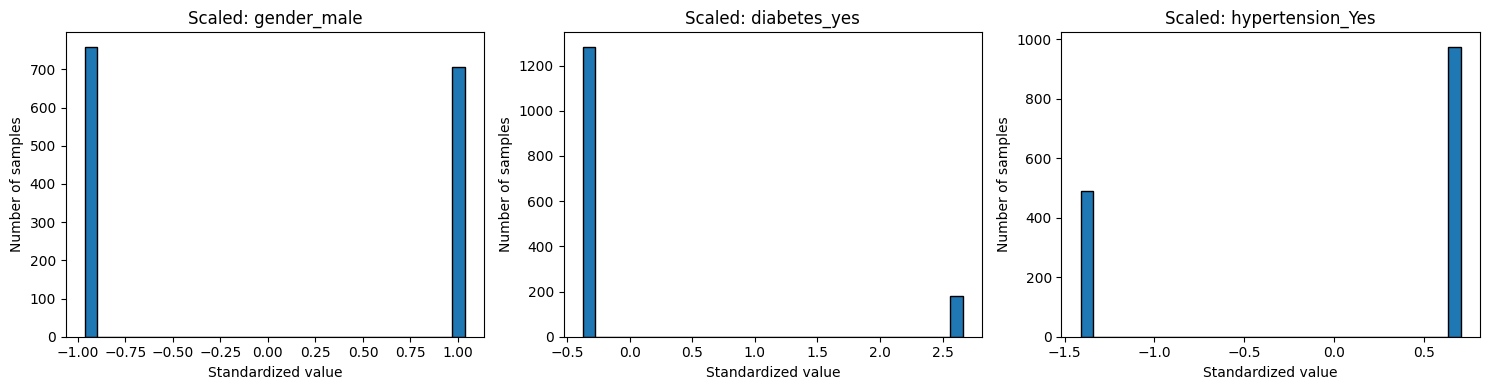

In [12]:
#Step 11: Feature Distribution After Scaling (with axis labels)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)

fig, axs = plt.subplots(1, 3, figsize=(15, 4))

axs[0].hist(X_train_scaled_df['gender_male'], bins=30, edgecolor='black')
axs[0].set_title("Scaled: gender_male")
axs[0].set_xlabel("Standardized value")
axs[0].set_ylabel("Number of samples")

axs[1].hist(X_train_scaled_df['diabetes_yes'], bins=30, edgecolor='black')
axs[1].set_title("Scaled: diabetes_yes")
axs[1].set_xlabel("Standardized value")
axs[1].set_ylabel("Number of samples")

axs[2].hist(X_train_scaled_df['hypertension_Yes'], bins=30, edgecolor='black')
axs[2].set_title("Scaled: hypertension_Yes")
axs[2].set_xlabel("Standardized value")
axs[2].set_ylabel("Number of samples")

plt.tight_layout()
plt.show()

In [13]:
# NAIVE BAYES ALGORITHM

In [14]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
y_pred_gnb = gnb.predict(X_test_scaled)

In [15]:
from sklearn.naive_bayes import CategoricalNB

cnb = CategoricalNB()
cnb.fit(X_train, y_train)
y_pred_cnb = cnb.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# GaussianNB Evaluation
print("GaussianNB Accuracy:", accuracy_score(y_test, y_pred_gnb))
print("GaussianNB Classification Report:")
print(classification_report(y_test, y_pred_gnb, zero_division=0))

# CategoricalNB Evaluation
print("CategoricalNB Accuracy:", accuracy_score(y_test, y_pred_cnb))
print("CategoricalNB Classification Report:")
print(classification_report(y_test, y_pred_cnb, zero_division=0))

GaussianNB Accuracy: 0.36065573770491804
GaussianNB Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.48      0.21      0.30        98
           2       0.79      0.41      0.54       268

    accuracy                           0.36       366
   macro avg       0.42      0.21      0.28       366
weighted avg       0.70      0.36      0.48       366

CategoricalNB Accuracy: 0.6939890710382514
CategoricalNB Classification Report:
              precision    recall  f1-score   support

           1       0.43      0.45      0.44        98
           2       0.80      0.78      0.79       268

    accuracy                           0.69       366
   macro avg       0.61      0.62      0.61       366
weighted avg       0.70      0.69      0.70       366



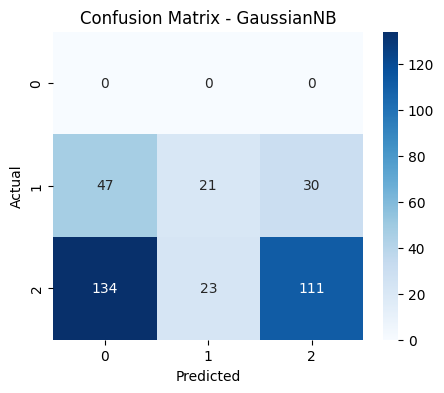

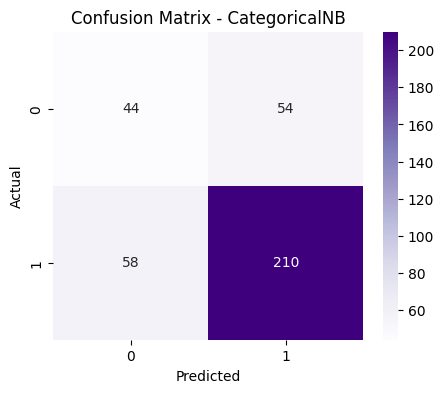

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# GaussianNB
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_gnb), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - GaussianNB")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# CategoricalNB
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_cnb), annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix - CategoricalNB")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [18]:
# Example input: Male, diabetes, hypertension
example = pd.DataFrame([[1, 1, 1]], columns=['gender_male', 'diabetes_yes', 'hypertension_Yes'])
for col in X.columns:
    if col not in example.columns:
        example[col] = 0
example = example[X.columns]
example_scaled = scaler.transform(example)

proba_gnb = gnb.predict_proba(example_scaled)[0]
proba_cnb = cnb.predict_proba(example)[0]

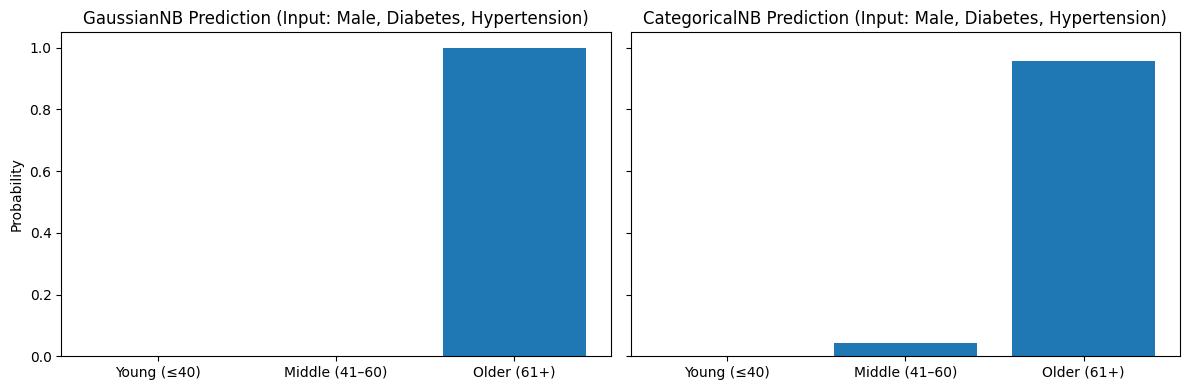

In [19]:
labels = ['Young (≤40)', 'Middle (41–60)', 'Older (61+)']
fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

axs[0].bar(labels, proba_gnb)
axs[0].set_title("GaussianNB Prediction (Input: Male, Diabetes, Hypertension)")
axs[0].set_ylabel("Probability")

axs[1].bar(labels, proba_cnb)
axs[1].set_title("CategoricalNB Prediction (Input: Male, Diabetes, Hypertension)")

plt.tight_layout()
plt.show()

In [20]:
def print_metrics(y_true, y_pred, model_name="Model"):
    labels_index = [0, 1, 2]
    labels_name = ["Young (≤40)", "Middle (41–60)", "Older (61+)"]

    print(f" {model_name} Accuracy: {accuracy_score(y_true, y_pred):.4f}\n")
    print(f" {model_name} Classification Report:")
    print(classification_report(
        y_true, y_pred,
        labels=labels_index,
        target_names=labels_name,
        zero_division=0
    ))
    
print_metrics(y_test, y_pred_gnb, "GaussianNB")
print_metrics(y_test, y_pred_cnb, "CategoricalNB")

 GaussianNB Accuracy: 0.3607

 GaussianNB Classification Report:
                precision    recall  f1-score   support

   Young (≤40)       0.00      0.00      0.00         0
Middle (41–60)       0.48      0.21      0.30        98
   Older (61+)       0.79      0.41      0.54       268

      accuracy                           0.36       366
     macro avg       0.42      0.21      0.28       366
  weighted avg       0.70      0.36      0.48       366

 CategoricalNB Accuracy: 0.6940

 CategoricalNB Classification Report:
                precision    recall  f1-score   support

   Young (≤40)       0.00      0.00      0.00         0
Middle (41–60)       0.43      0.45      0.44        98
   Older (61+)       0.80      0.78      0.79       268

      accuracy                           0.69       366
     macro avg       0.41      0.41      0.41       366
  weighted avg       0.70      0.69      0.70       366



In [21]:
# KNN Algorithm

In [22]:
# Step 1: Train KNN Classifier

from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)

In [23]:
# Step 2: Evaluate the Modelf
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn, zero_division=0))

KNN Accuracy: 0.73224043715847
KNN Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        98
           2       0.73      1.00      0.85       268

    accuracy                           0.73       366
   macro avg       0.37      0.50      0.42       366
weighted avg       0.54      0.73      0.62       366



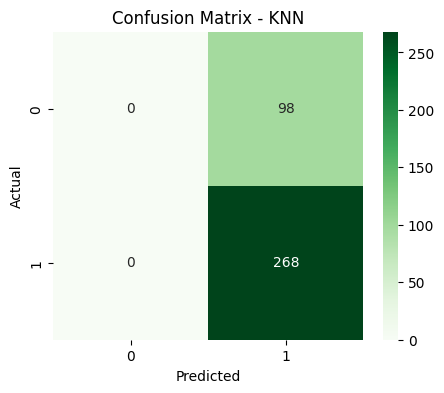

In [24]:
# Step 3: Visualize Confusion Matrix

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

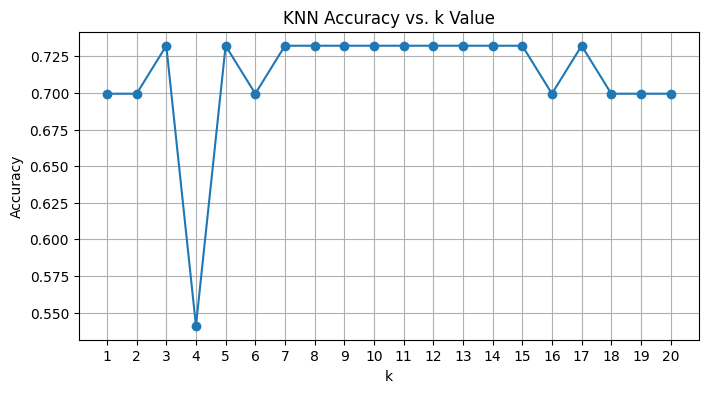

In [25]:
# Step 4: Experiment with Different k Values (Optional Tuning)

k_range = range(1, 21)
accuracies = []

for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    acc = accuracy_score(y_test, model.predict(X_test_scaled))
    accuracies.append(acc)

plt.figure(figsize=(8, 4))
plt.plot(k_range, accuracies, marker='o')
plt.title("KNN Accuracy vs. k Value")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [26]:
# Step 5: Predict Specific Case

In [27]:
# Male, diabetes, hypertension (same input example)
example = pd.DataFrame([[1, 1, 1]], columns=['gender_male', 'diabetes_yes', 'hypertension_Yes'])
for col in X.columns:
    if col not in example.columns:
        example[col] = 0
example = example[X.columns]
example_scaled = scaler.transform(example)

proba_knn = knn_model.predict_proba(example_scaled)[0]

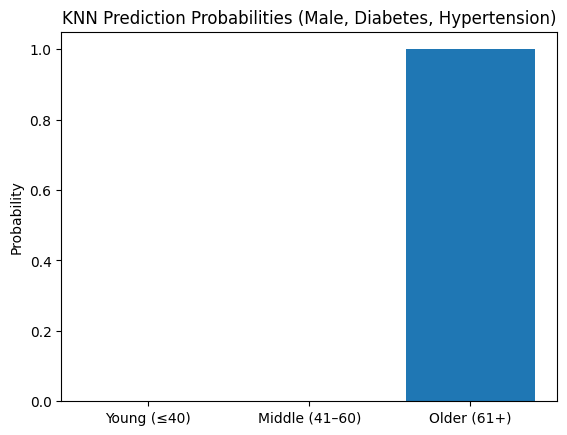

In [28]:
# Step 6: Visualize Prediction Probabilities

labels = ['Young (≤40)', 'Middle (41–60)', 'Older (61+)']

plt.bar(labels, proba_knn)
plt.title("KNN Prediction Probabilities (Male, Diabetes, Hypertension)")
plt.ylabel("Probability")
plt.show()


In [29]:
# Decision Tree

In [30]:
# Step 1: Train the Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(max_depth=4, criterion='entropy', random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [31]:
# Step 2: Evaluate the Model

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt, zero_division=0))

Decision Tree Accuracy: 0.73224043715847
Decision Tree Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        98
           2       0.73      1.00      0.85       268

    accuracy                           0.73       366
   macro avg       0.37      0.50      0.42       366
weighted avg       0.54      0.73      0.62       366



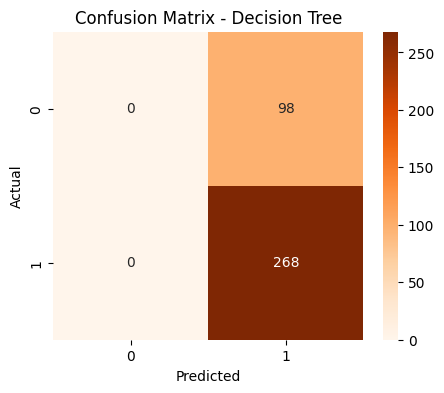

In [32]:
# Step 3: Visualize Confusion Matrix

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

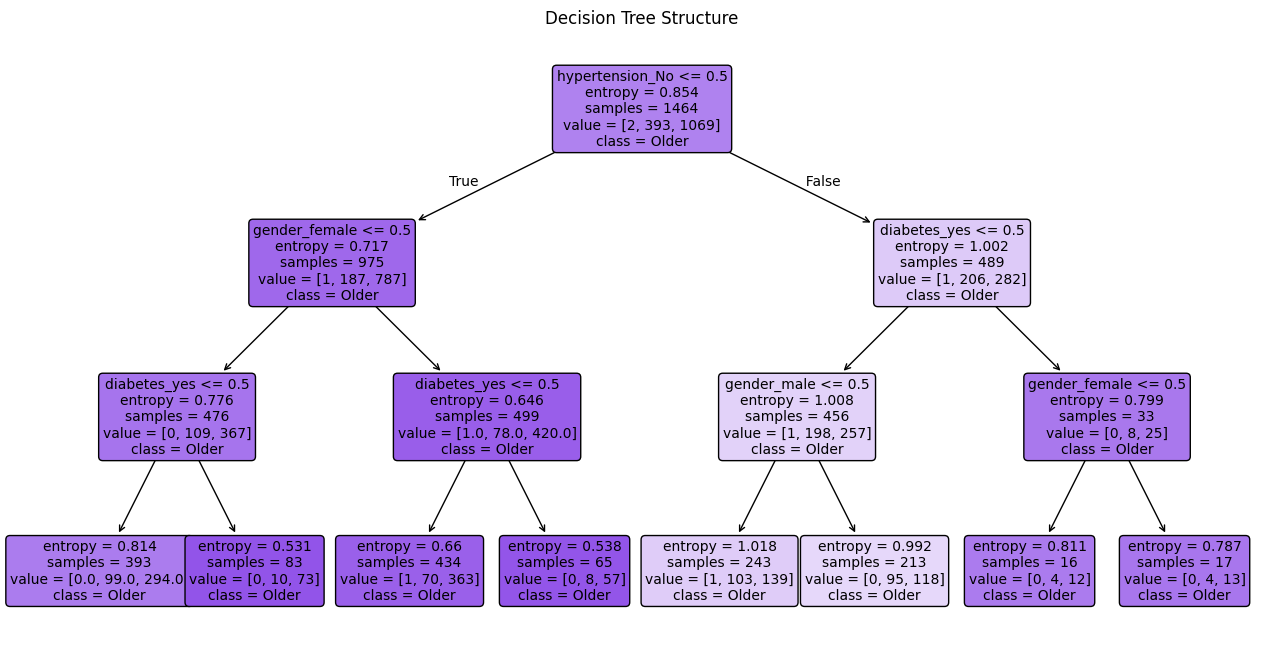

In [33]:
# Step 4: Visualize the Tree Structure

from sklearn.tree import plot_tree

plt.figure(figsize=(16, 8))
plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=["Young", "Middle", "Older"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Structure")
plt.show()

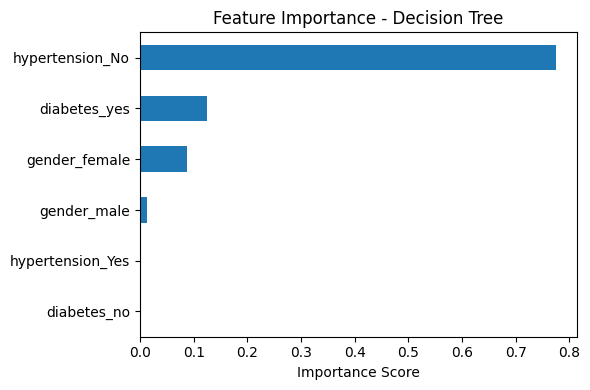

In [34]:
# Step 5: Feature Importance

import pandas as pd

importances = pd.Series(dt_model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=True)

plt.figure(figsize=(6, 4))
importances.plot(kind='barh')
plt.title("Feature Importance - Decision Tree")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

In [35]:
# Step 6: Predict Specific Case

# Male, diabetes, hypertension (same example as before)
example = pd.DataFrame([[1, 1, 1]], columns=['gender_male', 'diabetes_yes', 'hypertension_Yes'])
for col in X.columns:
    if col not in example.columns:
        example[col] = 0
example = example[X.columns]

proba_dt = dt_model.predict_proba(example)[0]

labels = ['Young (≤40)', 'Middle (41–60)', 'Older (61+)']
for label, prob in zip(labels, proba_dt):
    print(f"{label}: {prob:.2%}")

Young (≤40): 0.00%
Middle (41–60): 12.05%
Older (61+): 87.95%


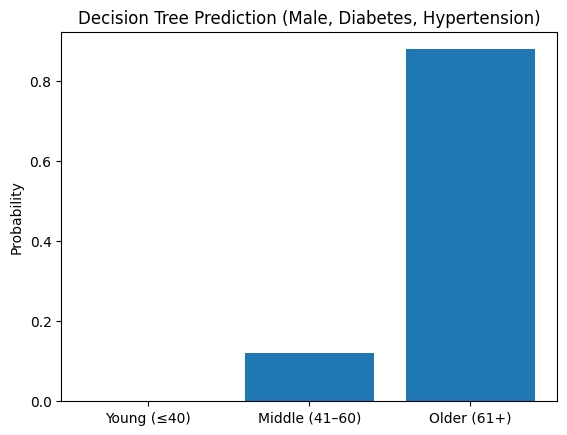

In [36]:
# Step 7: Visualize Prediction Probabilities

labels = ['Young (≤40)', 'Middle (41–60)', 'Older (61+)']

plt.bar(labels, proba_dt)
plt.title("Decision Tree Prediction (Male, Diabetes, Hypertension)")
plt.ylabel("Probability")
plt.show()

In [37]:
# Comparison Between 3 models

In [38]:
# Define the example input (male, diabetes, hypertension)
example = pd.DataFrame([[1, 1, 1]], columns=['gender_male', 'diabetes_yes', 'hypertension_Yes'])
for col in X.columns:
    if col not in example.columns:
        example[col] = 0
example = example[X.columns]
example_scaled = scaler.transform(example)

# Predict probabilities
proba_gnb = gnb.predict_proba(example_scaled)[0]
proba_knn = knn_model.predict_proba(example_scaled)[0]
proba_dt = dt_model.predict_proba(example)[0]

# Choose the best model based on test accuracy
acc_gnb = accuracy_score(y_test, y_pred_gnb)
acc_knn = accuracy_score(y_test, y_pred_knn)
acc_dt  = accuracy_score(y_test, y_pred_dt)

# Create a summary DataFrame
import numpy as np
summary = pd.DataFrame({
    "Model": ["GaussianNB", "KNN", "Decision Tree"],
    "Predicted Class": [np.argmax(proba_gnb), np.argmax(proba_knn), np.argmax(proba_dt)],
    "Confidence": [np.max(proba_gnb), np.max(proba_knn), np.max(proba_dt)],
    "Test Accuracy": [acc_gnb, acc_knn, acc_dt]
})

# Map class numbers to label names
class_labels = ['Young (≤40)', 'Middle (41–60)', 'Older (61+)']
summary["Predicted Class"] = summary["Predicted Class"].apply(lambda i: class_labels[i])

# Show the summary
print(summary)

           Model Predicted Class  Confidence  Test Accuracy
0     GaussianNB     Older (61+)    0.999905       0.360656
1            KNN     Older (61+)    1.000000       0.732240
2  Decision Tree     Older (61+)    0.879518       0.732240


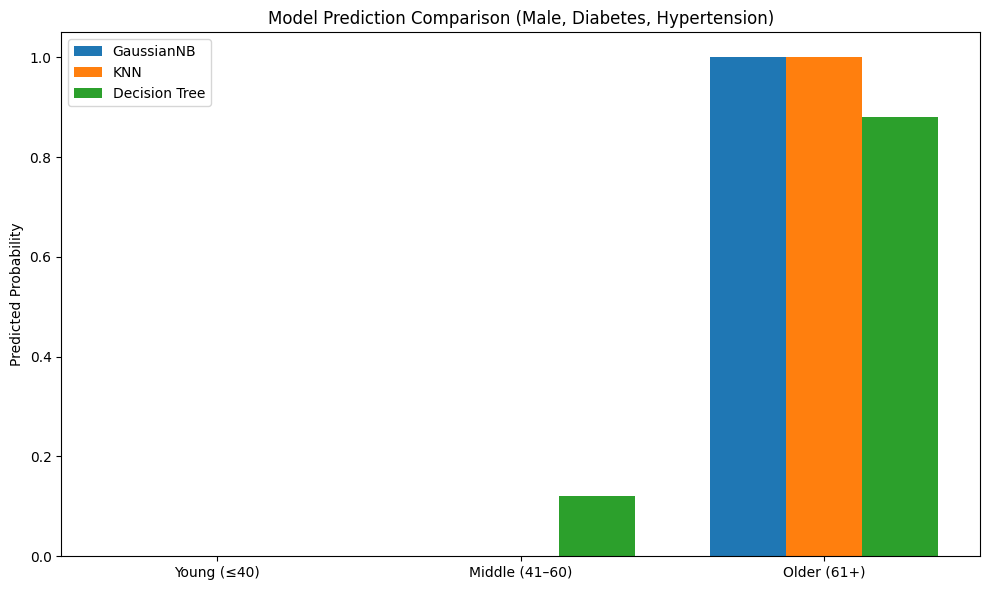

In [39]:
labels = ['Young (≤40)', 'Middle (41–60)', 'Older (61+)']
x = np.arange(len(labels))

plt.figure(figsize=(10, 6))
bar_width = 0.25

plt.bar(x - bar_width, proba_gnb, width=bar_width, label='GaussianNB')
plt.bar(x, proba_knn, width=bar_width, label='KNN')
plt.bar(x + bar_width, proba_dt, width=bar_width, label='Decision Tree')

plt.xticks(x, labels)
plt.ylabel("Predicted Probability")
plt.title("Model Prediction Comparison (Male, Diabetes, Hypertension)")
plt.legend()
plt.tight_layout()
plt.show()